# Milestone 1 - EDA and Preprocessing data 

- Load dataset
- Explore the dataset and ask atleast 5 questions to give you a better understanding of the data provided to you. 
- Visualise the answer to these 5 questions.
- Cleaing the data
- Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR) 
- Observe duplicate data
- Observe outliers
- After observing outliers,missing data and duplicates, handle any unclean data.
- With every change you are making to the data you need to comment on why you used this technique and how has it affected the data(by both showing the change in the data i.e change in number of rows/columns,change in distrubution, etc and commenting on it).
- Data transformation and feature engineering
- Add a new column named 'Week number' and discretisize the data into weeks according to the dates.Tip: Change the datatype of the date feature to datetime type instead of object.
- Encode any categorical feature(s) and comment on why you used this technique and how the data has changed.
- Identify feature(s) which need normalisation and show your reasoning.Then choose a technique to normalise the feature(s) and comment on why you chose this technique.
- Add atleast two more columns which adds more info to the dataset by evaluating specific feature(s). I.E( Column indicating whether the accident was on a weekend or not). 
- For any imputation with arbitrary values or encoding done, you have to store what the value imputed or encoded represents in a new csv file. I.e if you impute a missing value with -1 or 100 you must have a csv file illustrating what -1 and 100 means. Or for instance, if you encode cities with 1,2,3,4,etc what each number represents must be shown in the new csv file.
- Load the new dataset into a csv file.
- **Extremely Important note** - Your code should be as generic as possible and not hard-coded and be able to work with various datasets. Any hard-coded solutions will be severely penalised.
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

# 1 - Extraction

##### We import our important libraries the we are going to use throughout our project.

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from scipy import stats
import datetime
from cProfile import label
from pandas import Interval

##### In the next cell we import the included csv which is 1980_Accidents_UK.csv and displaying the first 50 record with all colunms showed

In [61]:
pd.set_option('display.max_columns', None)
dataset = './input/1980_Accidents_UK.csv'
df_accidents_1980 = pd.read_csv(dataset, index_col=None)
df_accidents_1980.head(50)


/tmp/ipykernel_48059/1398581416.py:3: DtypeWarning: Columns (14,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_accidents_1980 = pd.read_csv(dataset, index_col=None)


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,19800113MKA18,1980,0113MKA18,288680.0,118000.0,NaN,NaN,Metropolitan Police,Slight,1,1,03/09/1980,Wednesday,12:50,Westminster,-1,-1,A,40.0,Single carriageway,30.0,Crossroads,Auto traffic signal,-1,NaN,Data missing or out of range,Data missing or out of range,Daylight,Other,Dry,Data missing or out of range,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
1,19800113MKB18,1980,0113MKB18,280670.0,978000.0,NaN,NaN,Metropolitan Police,Slight,3,1,03/09/1980,Wednesday,12:50,Westminster,-1,-1,A,4.0,Dual carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,Data missing or out of range,Data missing or out of range,Daylight,Other,Dry,Data missing or out of range,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
2,19800114MAA22,1980,0114MAA22,266880.0,562000.0,NaN,NaN,Metropolitan Police,Slight,2,2,04/09/1980,Thursday,12:00,Camden,-1,-1,A,502.0,NaN,30.0,T or staggered junction,Give way or uncontrolled,-1,NaN,Data missing or out of range,Data missing or out of range,Daylight,Other,Dry,Data missing or out of range,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
3,19800114MAB22,1980,0114MAB22,290780.0,442000.0,NaN,NaN,Metropolitan Police,Slight,1,1,04/09/1980,Thursday,12:00,Camden,-1,-1,A,5202.0,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,-1,NaN,None within 50 metres,Zebra,Daylight,Other,Dry,Data missing or out of range,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
4,19800116UGA99,1980,0116UGA99,307670.0,459000.0,NaN,NaN,Metropolitan Police,Serious,1,1,06/09/1980,Saturday,20:30,Lambeth,-1,-1,A,23.0,NaN,30.0,Crossroads,Auto traffic signal,-1,NaN,Data missing or out of range,Data missing or out of range,Darkness - lights lit,Other,Dry,Data missing or out of range,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
5,19800116UGB99,1980,0116UGB99,320470.0,439000.0,NaN,NaN,Metropolitan Police,Slight,2,1,06/09/1980,Saturday,20:30,Lambeth,-1,-1,A,215.0,Single carriageway,30.0,More than 4 arms (not roundabout),Auto traffic signal,-1,NaN,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Other,Dry,Data missing or out of range,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
6,1980011CSGA00,1980,011CSGA00,204090.0,210000.0,NaN,NaN,Metropolitan Police,Slight,1,1,12/09/1980,Friday,18:30,Barnet,-1,-1,A,5109.0,NaN,30.0,T or staggered junction,Give way or uncontrolled,-1,NaN,Data missing or out of range,Data missing or out of range,Daylight,Other,Dry,Data missing or out of range,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
7,1980011IUJA13,1980,011IUJA13,271360.0,533000.0,NaN,NaN,Metropolitan Police,Slight,3,1,18/09/1980,Thursday,20:45,Sutton,-1,-1,B,278.0,NaN,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,Data missing or out of range,Data missing or out of range,Darkness - lights lit,Other,Dry,Data missing or out of range,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
8,1980011IUJB13,1980

# 2- EDA

**What is the ratio between accidents that happened at day and accidents that happened at night?**

In [62]:
def isNowInTimePeriod(startTime, endTime, nowTime): 
    if startTime < endTime: 
        return nowTime >= startTime and nowTime <= endTime 
    else: 
        #Over midnight: 
        return nowTime >= startTime or nowTime <= endTime 


df_accidents_1980['time'].apply(lambda x: (datetime.datetime.strptime(x,'%H:%M'))).apply(lambda x: isNowInTimePeriod(datetime.time(19,0),datetime.time(6,0),x.time())).value_counts()

False    178807
True      72151
Name: time, dtype: int64

##### 178807 accients happened at day. 72151 happened at night.

**Is there a relation between accident_severity and number_of_casualties?**

<AxesSubplot: xlabel='accident_severity', ylabel='number_of_casualties'>

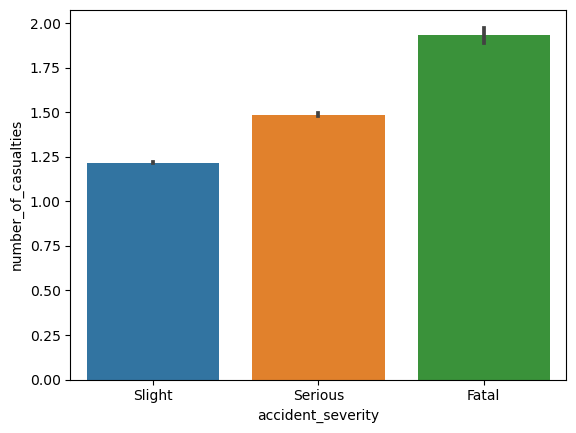

In [63]:
sns.barplot(x="accident_severity", y="number_of_casualties",
            data=df_accidents_1980)


As shown in the previous graph there is a direct relationship between accident_severity and number_of_casualties.

<AxesSubplot: xlabel='accident_severity', ylabel='speed_limit'>

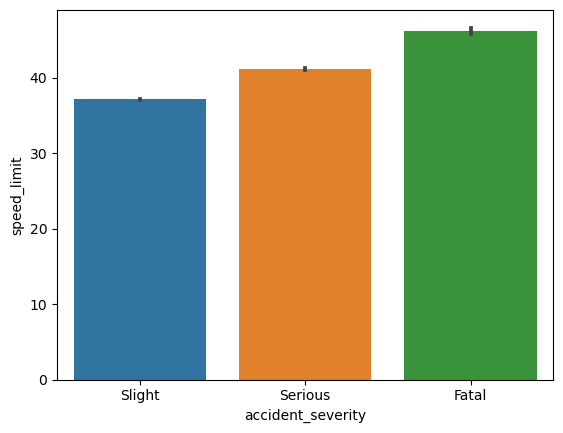

In [64]:
sns.barplot(x="accident_severity", y="speed_limit",
            data=df_accidents_1980)


**What is the district with more accidents?**

In [65]:
df_accidents_1980['local_authority_district'].value_counts()

Birmingham     4597
836            3342
Westminster    3141
Leeds          3068
824            2573
               ... 
807              66
803              52
801              52
811              50
803              30
Name: local_authority_district, Length: 460, dtype: int64

Birmingham is the most district with accients

**What is the most frequent weather condition for accidents along the year 1980?**

In [66]:
df_accidents_1980['weather_conditions'].value_counts()

Fine no high winds       153023
Other                     46648
Raining no high winds     39461
Fine + high winds          4390
Raining + high winds       3436
Snowing no high winds      1519
Fog or mist                1270
Snowing + high winds        454
Name: weather_conditions, dtype: int64

Fine no high winds is the most frequent

# 3 - Cleaning Data

## Observing Missing and duplicate Data

 ##### We start by observing the missing values in each column and showing the percentage of missing rate of each column so we can clean our data. If we found any dummy data that is represented to be missed i.e. (Data missing, N.A. , -1 and ect.) then we turn them into NAN as they are represented as empty or missing values.

In [67]:
perc_null = df_accidents_1980.isnull().mean() * 100
perc_null

accident_index                                   0.000000
accident_year                                    0.000000
accident_reference                               0.000000
location_easting_osgr                            0.115159
location_northing_osgr                           0.115159
longitude                                      100.000000
latitude                                       100.000000
police_force                                     0.000000
accident_severity                                0.000000
number_of_vehicles                               0.000000
number_of_casualties                             0.000000
date                                             0.000000
day_of_week                                      0.000000
time                                             0.000000
local_authority_district                         0.000000
local_authority_ons_district                     0.000000
local_authority_highway                          0.000000
first_road_cla

##### We've noticed from the above celll that there are some columns already that are initialized as empty columns with nothing written. N.B: Any column with a missing rate with more than 80% or above is going to get dropped from the data.

##### We deploy a new variable which holds the unique values of each feature so we can tell more about each column and the missing or unrecorded data

In [68]:
df_unique = df_accidents_1980.apply(lambda col: col.unique())
df_unique

accident_index                                 [19800113MKA18, 19800113MKB18, 19800114MAA22, ...
accident_year                                                                             [1980]
accident_reference                             [0113MKA18, 0113MKB18, 0114MAA22, 0114MAB22, 0...
location_easting_osgr                          [288680.0, 280670.0, 266880.0, 290780.0, 30767...
location_northing_osgr                         [118000.0, 978000.0, 562000.0, 442000.0, 45900...
longitude                                                                                  [nan]
latitude                                                                                   [nan]
police_force                                   [Metropolitan Police, Cumbria, Lancashire, Mer...
accident_severity                                                       [Slight, Serious, Fatal]
number_of_vehicles                             [1, 3, 2, 4, 5, 6, 11, 7, 10, 9, 8, 14, 13, 16...
number_of_casualties          

##### Firstly, we started investigating the very first 3 columns of the data frame (accident_index, accident_reference and accident_year). Just to make sure that accident_index and accident_reference have unique values we calculated the number of unique values for each column of them. and if the difference between the number of unique values = number of entires for each column of them that means that both columns have unique values. We also found that the number of unique values in column accident_year =  1. That means that all values in column accident_year are the same. Moreover this motivated us that we can drop accident_year column since there's a accident_date column which includes the year.

In [69]:
accident_index_unique_counts = len(
    df_accidents_1980["accident_index"].unique())
accident_refernce_unique_counts = len(
    df_accidents_1980["accident_reference"].unique())
number_of_entries = len(df_accidents_1980)
"Number of Unique accident_index: " + \
    str(accident_index_unique_counts), "Number of Unique accident_refrence: " + \
    str(accident_refernce_unique_counts), "Number of total entries:  " + \
    str(number_of_entries)

(np.equal((df_accidents_1980["accident_year"].astype(str) +
          df_accidents_1980["accident_reference"]), df_accidents_1980["accident_index"])).all()

df_accidents_1980["accident_year"].unique()

array([1980])

In the next cell, we found that accident_year and accident_reference are string concatenated together to give us accident_index. We made sure that this is true so we can drop both columns accident year and accident index since there's no need for the 1980 value in both.

In [70]:
num_c_un = df_accidents_1980[df_accidents_1980['first_road_class']
                         == 'C']['first_road_class'].count() + df_accidents_1980[df_accidents_1980['first_road_class']
                                                                                       == 'Unclassified']['first_road_class'].count()
num_missing_road = df_accidents_1980[df_accidents_1980['first_road_number']
                                     == 'first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ']['first_road_class'].count()
if num_c_un == num_missing_road:
    print(True)
else:
    print(False)

True


####In the up coming cell, we replaced every String or non-string value that is represented as missing value with Nan to evaluate more the missing rate of each column.

In [71]:
df_accidents_1980_clean = df_accidents_1980.replace(
    'Data missing or out of range', np.nan)
df_accidents_1980_clean = df_accidents_1980_clean.replace(
    -1, np.nan)
df_accidents_1980_clean = df_accidents_1980_clean.replace(
    '-1', np.nan)
df_accidents_1980_clean = df_accidents_1980_clean.replace(
    'first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ', 0)
df_null = df_accidents_1980_clean.isnull().mean() * 100
df_null

accident_index                                   0.000000
accident_year                                    0.000000
accident_reference                               0.000000
location_easting_osgr                            0.115159
location_northing_osgr                           0.115159
longitude                                      100.000000
latitude                                       100.000000
police_force                                     0.000000
accident_severity                                0.000000
number_of_vehicles                               0.000000
number_of_casualties                             0.000000
date                                             0.000000
day_of_week                                      0.000000
time                                             0.000000
local_authority_district                         0.000000
local_authority_ons_district                   100.000000
local_authority_highway                        100.000000
first_road_cla

## Handling Missing data

##### The next cell, we dropped the columns with 100% missing rate. (MCAR)

In [72]:
df_accidents_1980_clean = df_accidents_1980_clean.dropna(
    axis='columns', how='all')

##### As mentioned above, for the investigation of the 3 columns accident_index, accident_year and accident_reference. We dropped both accident_index, accident_year  (Duplicate)

In [73]:
(np.equal((df_accidents_1980["accident_year"].astype(str) +
          df_accidents_1980["accident_reference"]), df_accidents_1980["accident_index"])).all()  # checking the accident_year concatenated to the accident_reference is equal to the accident_index
df_accidents_1980_clean = df_accidents_1980_clean.drop(
    'accident_index', axis=1)  # dropping the accident_index

df_accidents_1980_clean = df_accidents_1980_clean.set_index(
    'accident_reference')


##### Moreover, we dropped all NAN values in the remaining columns. (MCAR)

In [74]:
df_accidents_1980_clean = df_accidents_1980_clean.dropna(
    axis='index', how='any', subset=['location_easting_osgr', 'location_easting_osgr', 'junction_detail', 'first_road_number', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'carriageway_hazards'])
#df_accidents_1980_clean = df_accidents_1980_clean.drop('second_road_number',axis=1)



##### We found a relation between the missing values in junction_detail (Not at junction or within 20 metres) and empty values in junction_control. They both have almost the same missing rate. That means that there are some edge cases (>1%) that can be dropped (MNAR)

In [75]:
df_filter = df_accidents_1980_clean[(df_accidents_1980_clean['second_road_class'].notna()) & ~(
    df_accidents_1980_clean['second_road_number'].notna())].index
df_accidents_1980_clean = df_accidents_1980_clean.drop(df_filter)
print((df_accidents_1980_clean[df_accidents_1980_clean['junction_detail']
                         == 'Not at junction or within 20 metres']['junction_detail'].count()) / len(df_accidents_1980_clean.index) * 100)

print(df_null['junction_control'])

41.65815887352815
41.71415137194271


#####We dropped the edge cases for them (MAR)

In [76]:
df_filter = df_accidents_1980_clean[((df_accidents_1980_clean['junction_detail'] != 'Not at junction or within 20 metres') & ~(
    df_accidents_1980_clean['junction_control'].notna())) |((df_accidents_1980_clean['junction_detail'].isna()) & (
    df_accidents_1980_clean['junction_control'].notna()))].index
df_accidents_1980_clean = df_accidents_1980_clean.drop(df_filter)
print((df_accidents_1980_clean[df_accidents_1980_clean['junction_detail']
                         == 'Not at junction or within 20 metres']['junction_detail'].count()) / len(df_accidents_1980_clean.index) * 100)

print(df_accidents_1980_clean.isna().mean()['junction_control'] * 100)

41.677514970659516
41.677514970659516


##### We wanted to start imputing the columns with missing rate with less than 80% since we can't drop them. We started with both columns pedestrian_crossing_physical_facilities and pedestrian_crossing_human_control. After encode (FOR IMPUTATION) both columns because they both had categorical values. We did that because we wanted to observe and visualize the data to know which imputation technique to use. (MNAR)

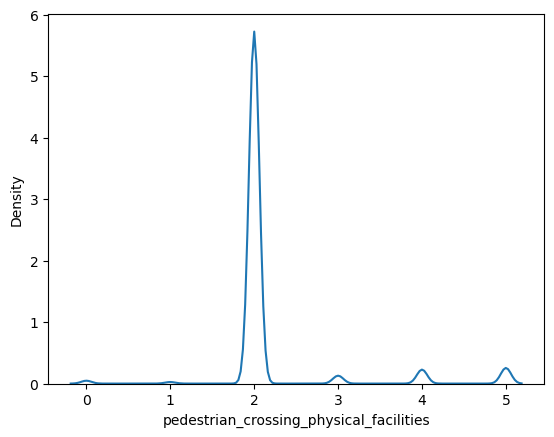

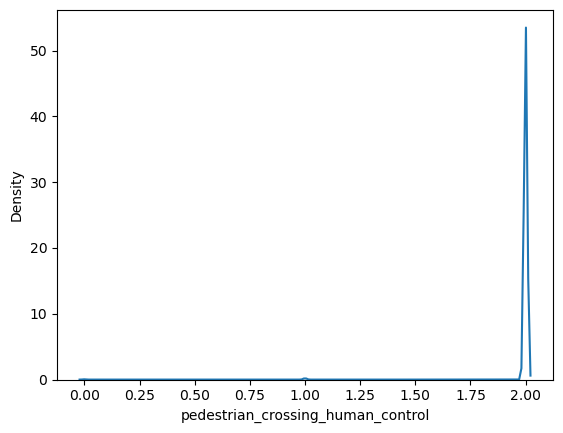

In [77]:

data = df_accidents_1980_clean[['pedestrian_crossing_human_control',
                                 'pedestrian_crossing_physical_facilities']].dropna()
data['pedestrian_crossing_physical_facilities'] = data['pedestrian_crossing_physical_facilities'].astype(
    'category')
data['pedestrian_crossing_physical_facilities'] = data['pedestrian_crossing_physical_facilities'].cat.codes

data['pedestrian_crossing_human_control'] = data['pedestrian_crossing_human_control'].astype(
    'category')
data['pedestrian_crossing_human_control'] = data['pedestrian_crossing_human_control'].cat.codes

sns.kdeplot(data["pedestrian_crossing_physical_facilities"])

plt.show()
sns.kdeplot(data["pedestrian_crossing_human_control"])
plt.show()

##### After observing the graphs, We decided to choose to imput the missing values with the median because we observed a discrete values. We could have chosen to imput with the mode however they are gonna give us the same values at the end of the day. (MCAR)

In [78]:
data["pedestrian_crossing_human_control"].median()
ind = data[data["pedestrian_crossing_human_control"] == data["pedestrian_crossing_human_control"].median()].index[0]
pedesMedian = df_accidents_1980_clean["pedestrian_crossing_human_control"][ind]
df_accidents_1980_clean["pedestrian_crossing_human_control"] = df_accidents_1980_clean["pedestrian_crossing_human_control"].replace(np.nan, pedesMedian)
df_null = df_accidents_1980_clean.isna().mean() * 100

df_null


accident_year                               0.000000
location_easting_osgr                       0.000000
location_northing_osgr                      0.000000
police_force                                0.000000
accident_severity                           0.000000
number_of_vehicles                          0.000000
number_of_casualties                        0.000000
date                                        0.000000
day_of_week                                 0.000000
time                                        0.000000
local_authority_district                    0.000000
first_road_class                            0.000000
first_road_number                           0.000000
road_type                                  11.281168
speed_limit                                 0.000000
junction_detail                             0.000000
junction_control                           41.677515
second_road_class                          55.202179
second_road_number                         55.

In [79]:
data["pedestrian_crossing_physical_facilities"].median()
ind = data[data["pedestrian_crossing_physical_facilities"] == data["pedestrian_crossing_physical_facilities"].median()].index[0]
pedesMedian = df_accidents_1980_clean["pedestrian_crossing_physical_facilities"][ind]
df_accidents_1980_clean["pedestrian_crossing_physical_facilities"] = df_accidents_1980_clean["pedestrian_crossing_physical_facilities"].replace(np.nan, pedesMedian)
df_null = df_accidents_1980_clean.isna().mean() * 100

df_null

accident_year                               0.000000
location_easting_osgr                       0.000000
location_northing_osgr                      0.000000
police_force                                0.000000
accident_severity                           0.000000
number_of_vehicles                          0.000000
number_of_casualties                        0.000000
date                                        0.000000
day_of_week                                 0.000000
time                                        0.000000
local_authority_district                    0.000000
first_road_class                            0.000000
first_road_number                           0.000000
road_type                                  11.281168
speed_limit                                 0.000000
junction_detail                             0.000000
junction_control                           41.677515
second_road_class                          55.202179
second_road_number                         55.

##### Same imputation techinque goes with special_conditions_at_site columns with the same reasoning

<AxesSubplot: xlabel='special_conditions_at_site', ylabel='Density'>

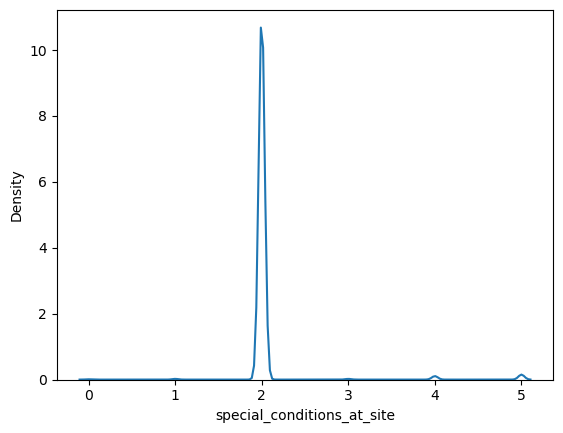

In [80]:
df_accidents_1980_clean["special_conditions_at_site"].unique()
data = df_accidents_1980_clean[['special_conditions_at_site']].dropna()
data['special_conditions_at_site'] = data['special_conditions_at_site'].astype(
    'category')
data['special_conditions_at_site'] = data['special_conditions_at_site'].cat.codes
sns.kdeplot(data["special_conditions_at_site"])



In [81]:
data["special_conditions_at_site"].median()
ind = data[data["special_conditions_at_site"] == data["special_conditions_at_site"].median()].index[0]
specMedian = df_accidents_1980_clean["special_conditions_at_site"][ind]
df_accidents_1980_clean["special_conditions_at_site"] = df_accidents_1980_clean["special_conditions_at_site"].replace(np.nan, pedesMedian)
df_null = df_accidents_1980_clean.isna().mean() * 100

df_null

accident_year                               0.000000
location_easting_osgr                       0.000000
location_northing_osgr                      0.000000
police_force                                0.000000
accident_severity                           0.000000
number_of_vehicles                          0.000000
number_of_casualties                        0.000000
date                                        0.000000
day_of_week                                 0.000000
time                                        0.000000
local_authority_district                    0.000000
first_road_class                            0.000000
first_road_number                           0.000000
road_type                                  11.281168
speed_limit                                 0.000000
junction_detail                             0.000000
junction_control                           41.677515
second_road_class                          55.202179
second_road_number                         55.

## Findings and conclusions

##### Lastly, we decided that we should also drop the columns second_road_class and second_road_number. Why we did that ? the reason is they we couldn't identify any relation between them ,and most of their values are either missing or empty.

## At the end, we successfully managed to compute a clean data with all data are valid

location_easting_osgr                      0.0
location_northing_osgr                     0.0
police_force                               0.0
accident_severity                          0.0
number_of_vehicles                         0.0
number_of_casualties                       0.0
date                                       0.0
day_of_week                                0.0
time                                       0.0
local_authority_district                   0.0
first_road_class                           0.0
first_road_number                          0.0
road_type                                  0.0
speed_limit                                0.0
junction_detail                            0.0
junction_control                           0.0
pedestrian_crossing_human_control          0.0
pedestrian_crossing_physical_facilities    0.0
light_conditions                           0.0
weather_conditions                         0.0
road_surface_conditions                    0.0
special_condi

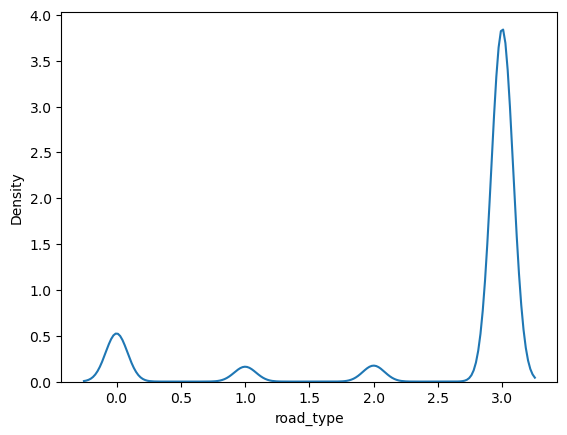

In [82]:

data = df_accidents_1980_clean[['road_type']].dropna()
data['road_type'] = data['road_type'].astype(
    'category')
data['road_type'] = data['road_type'].cat.codes
sns.kdeplot(data["road_type"])
data["road_type"].median()
ind = data[data["road_type"] == data["road_type"].median()].index[0]
specMedian = df_accidents_1980_clean["road_type"][ind]
df_accidents_1980_clean["road_type"] = df_accidents_1980_clean["road_type"].replace(np.nan, pedesMedian)
df_accidents_1980_clean["junction_control"] = df_accidents_1980_clean["junction_control"].replace(np.nan, "None")

df_accidents_1980_clean = df_accidents_1980_clean.drop('second_road_class',axis=1)
df_accidents_1980_clean = df_accidents_1980_clean.drop('second_road_number',axis=1)
df_accidents_1980_clean = df_accidents_1980_clean.drop('accident_year',axis=1)
df_null = df_accidents_1980_clean.isna().mean() * 100

df_null


## Observing outliers

##### In this phase, we are going to choose a sutiable techinque and plot a graph for each integral columns that be important to observe its outliers and eliminate them.

##### We found the only features that we can check for outliers are number_of_vehicles, number_of_casualties and speed_limit.

##### We started with number_of_vehicles column. We plotted a kdeplot graph to observe outliers with z-score and we calculate the percentage of the outliers and we found that it was only 1.3%

1.377100398549999

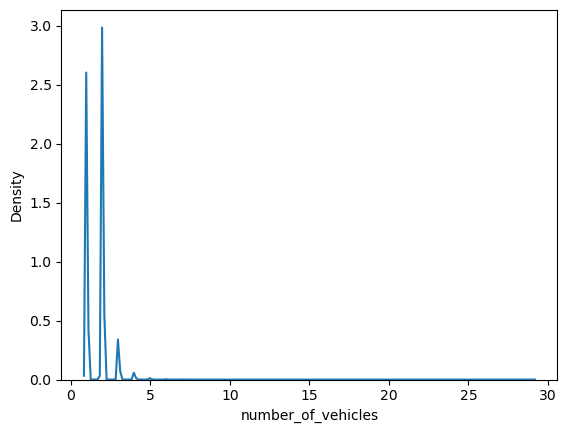

In [83]:

sns.kdeplot(df_accidents_1980_clean['number_of_vehicles'])

z = np.abs(stats.zscore(df_accidents_1980_clean['number_of_vehicles']))

veh_filtered_entries = z < 3
(np.bitwise_not(veh_filtered_entries).sum() /
 len(df_accidents_1980_clean.index)) * 100


number_of_vehicles column. We plotted a boxplot graph to observe outliers and we calculate the percentage of the outliers and we found that it was only 1.3%

1.0
-0.5 3.5
Percentage of outliers are 1.377100398549999


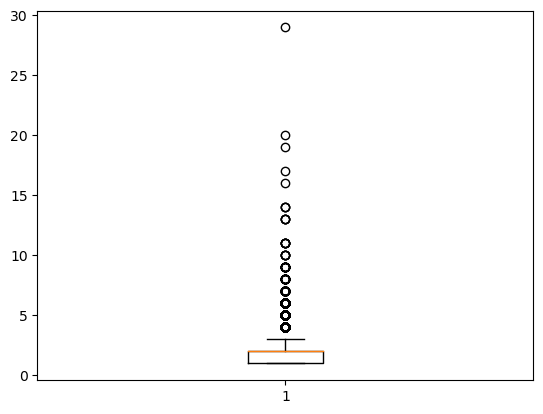

In [84]:
plt.boxplot(df_accidents_1980_clean['number_of_vehicles'])
Q1 = df_accidents_1980_clean['number_of_vehicles'].quantile(0.25)
Q3 = df_accidents_1980_clean['number_of_vehicles'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
cut_off = IQR * 1.5
lower = Q1 - cut_off
upper = Q3 + cut_off
print(lower, upper)
df1 = df_accidents_1980_clean[df_accidents_1980_clean['number_of_vehicles'] > upper]
df2 = df_accidents_1980_clean[df_accidents_1980_clean['number_of_vehicles'] < lower]
print('Percentage of outliers are',
      (df1.shape[0] + df2.shape[0]) / len(df_accidents_1980_clean.index) * 100)


##### number_of_casualties column. We plotted a kdeplot graph to observe outliers with z-score and we calculate the percentage of the outliers and we found that it was only 0.9%

0.9380945705072999

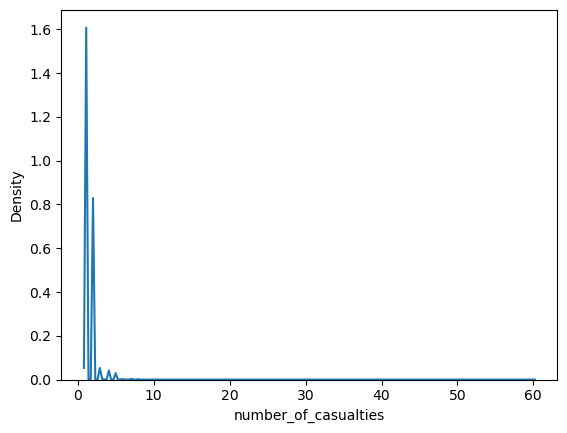

In [85]:
sns.kdeplot(df_accidents_1980_clean['number_of_casualties'])

z = np.abs(stats.zscore(df_accidents_1980_clean['number_of_casualties']))

cas_filtered_entries = z < 4
(np.bitwise_not(cas_filtered_entries).sum() /
 len(df_accidents_1980_clean.index)) * 100


##### number_of_casualties column. We plotted a boxplot graph to observe outliers and we calculate the percentage of the outliers and we found that it was only 0.19%

0.0
1.0 1.0
Percentage of outliers are 0.19854599347098997


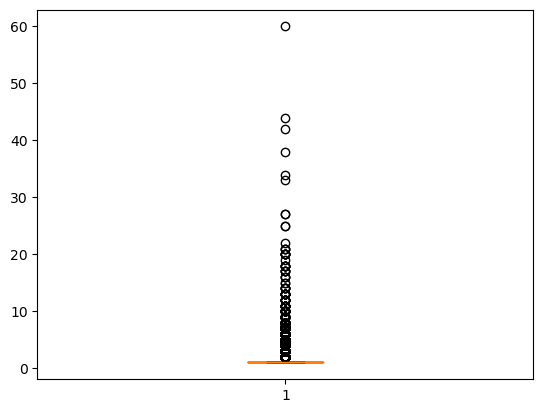

In [86]:

plt.boxplot(df_accidents_1980_clean['number_of_casualties'])
Q1 = df_accidents_1980_clean['number_of_casualties'].quantile(0.25)
Q3 = df_accidents_1980_clean['number_of_casualties'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
cut_off = IQR * 1.5
lower = Q1 - cut_off
upper = Q3 + cut_off
print(lower, upper)
df1 = df_accidents_1980_clean[df_accidents_1980_clean['number_of_casualties'] > upper]
df2 = df_accidents_1980_clean[df_accidents_1980_clean['number_of_casualties'] < lower]
print('Percentage of outliers are',
      (df1.shape[0] + df2.shape[0]) / len(df_accidents_1980_clean.index))


##### speed_limit column. We plotted a kdeplot graph to observe outliers with z-score and we calculate the percentage of the outliers and we found that it was only 0%

0.0

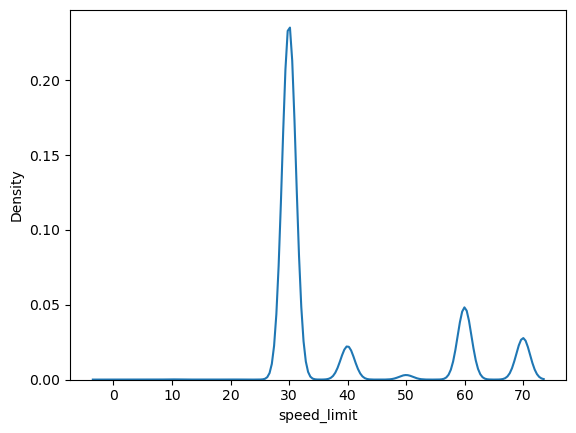

In [87]:

sns.kdeplot(df_accidents_1980_clean['speed_limit'])
z = np.abs(stats.zscore(df_accidents_1980_clean['speed_limit']))

filtered_entries = z < 3
(np.bitwise_not(filtered_entries).sum() / len(df_accidents_1980_clean.index)) * 100


##### speed_limit column. We plotted a boxplot graph to observe outliers and we calculate the percentage of the outliers and we found that it was only 0.22%

10.0
15.0 55.0
Percentage of outliers are 0.2246620336063768


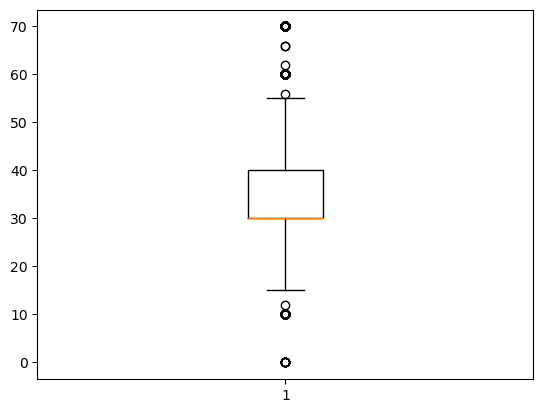

In [88]:

plt.boxplot(df_accidents_1980_clean['speed_limit'])
Q1 = df_accidents_1980_clean['speed_limit'].quantile(0.25)
Q3 = df_accidents_1980_clean['speed_limit'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
cut_off = IQR * 1.5
lower = Q1 - cut_off
upper = Q3 + cut_off
print(lower, upper)
df1 = df_accidents_1980_clean[df_accidents_1980_clean['speed_limit'] > upper]
df2 = df_accidents_1980_clean[df_accidents_1980_clean['speed_limit'] < lower]
print('Percentage of outliers are',
      (df1.shape[0] + df2.shape[0]) / len(df_accidents_1980_clean.index))


## Handling outliers

##### After observing the outliers, we need to imput these outliers with the median. We ignored the speed_limit column because its percentages were too small 0% with kde and 0.22% with boxPlot

In [89]:
veh_med = df_accidents_1980_clean[veh_filtered_entries]['number_of_vehicles'].median(
)
print(veh_med)
print(len(df_accidents_1980_clean.index))
df_accidents_1980_clean['number_of_vehicles'] = df_accidents_1980_clean['number_of_vehicles'].where(
    veh_filtered_entries, other=veh_med)
df_accidents_1980_clean[~veh_filtered_entries]


2.0
249655


,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
accident_reference,,,,,,,,,,,,,,,,,,,,,,,
01A1DGW89,217980.0,329000.0,Metropolitan Police,Slight,2,1,01/01/1980,Tuesday,03:30,Brent,Unclassified,0,Single carriageway,30.0,Not at junction or within 20 metres,None,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Other,Snow,No physical crossing facilities within 50 metres,None
01A1DIP28,241380.0,178000.0,Metropolitan Police,Slight,2,1,01/01/1980,Tuesday,03:40,Kensington and Chelsea,C,0,No physical crossing facilities within 50 metres,30.0,T or staggered junction,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Other,Dry,No physical crossing facilities within 50 metres,None
01A1EGV32,394580.0,562000.0,Metropolitan Police,Slight,2,1,01/01/1980,Tuesday,04:30,Waltham Forest,Unclassified,0,No physical crossing facilities within 50 metres,30.0,Not at junction or within 20 metres,None,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Other,Dry,No physical crossing facilities within 50 metres,None
01A1OJV21,250080.0,131000.0,Metropolitan Police,Slight,2,1,01/01/1980,Tuesday,14:45,Kensington and Chelsea,Unclassified,0,No physical crossing facilities within 50 metres,30.0,Crossroads,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Other,Dry,No physical crossing facilities within 50 metres,None
01A2HCD44,403290.0,54000.0,Metropolitan Police,Fatal,2,1,02/01/1980,Wednesday,07:10,Redbridge,A,406.0,Dual carriageway,30.0,Not at junction or within 20 metres,None,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Other,Wet or damp,No physical crossing facilities within 50 metres,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981027374,317400.0,576100.0,Dumfries and Galloway,Slight,2,3,19/07/1980,Saturday,15:00,859,A,74.0,Dual carriageway,70.0,Not at junction or within 20 metres,None,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining no high winds,Wet or damp,None,None
981054384,331500.0,568700.0,Dumfries and Galloway,Slight,2,3,19/07/1980,Saturday,09:10,859,A,74.0,Dual carriageway,70.0,Not at junction or within 20 metres,None,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining no high winds,Wet or damp,None,None
981447531,296300.0,576300.0,Dumfries and Galloway,Slight,2,1,07/10/1980,Tuesday,23:45,858,C,0,Single carriageway,30.0,Not at junction or within 20 metres,None,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Other,Dry,None,None


In [90]:
cas_med = df_accidents_1980_clean[cas_filtered_entries]['number_of_casualties'].median(
)
print(cas_filtered_entries)
print(len(df_accidents_1980_clean.index))
df_accidents_1980_clean['number_of_casualties'] = df_accidents_1980_clean['number_of_casualties'].where(
    cas_filtered_entries, other=cas_med)
df_accidents_1980_clean[~cas_filtered_entries]


accident_reference
0113MKA18     True
0113MKB18     True
0114MAA22     True
0114MAB22     True
0116UGA99     True
             ...  
981840661     True
981841662     True
981869663     True
981870664     True
981871665    False
Name: number_of_casualties, Length: 249655, dtype: bool
249655


,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
accident_reference,,,,,,,,,,,,,,,,,,,,,,,
01A1CHC49,371380.0,529000.0,Metropolitan Police,Slight,2,1,01/01/1980,Tuesday,02:35,Hackney,A,106.0,Single carriageway,40.0,Not at junction or within 20 metres,None,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Other,Snow,No physical crossing facilities within 50 metres,None
01A3IKF94,103360.0,104000.0,Metropolitan Police,Serious,2,1,03/01/1980,Thursday,08:50,Elmbridge,A,3.0,Dual carriageway,70.0,Not at junction or within 20 metres,None,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining no high winds,Snow,No physical crossing facilities within 50 metres,None
01A3JAY01,45070.0,521000.0,Metropolitan Police,Slight,2,1,03/01/1980,Thursday,09:00,Spelthorne,Unclassified,0,No physical crossing facilities within 50 metres,30.0,Not at junction or within 20 metres,None,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Other,Snow,No physical crossing facilities within 50 metres,None
01A6RCC83,337270.0,83000.0,Metropolitan Police,Slight,3,1,06/01/1980,Sunday,17:10,Southwark,A,212.0,No physical crossing facilities within 50 metres,30.0,Not at junction or within 20 metres,None,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Other,Dry,No physical crossing facilities within 50 metres,None
01A6XAF34,244300.0,154000.0,Metropolitan Police,Slight,2,1,06/01/1980,Sunday,23:00,Hertsmere,A,111.0,No physical crossing facilities within 50 metres,30.0,T or staggered junction,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Other,Wet or damp,No physical crossing facilities within 50 metres,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980751271,292300.0,584300.0,Dumfries and Galloway,Serious,3,1,08/06/1980,Sunday,02:35,858,A,76.0,Single carriageway,60.0,Slip road,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Raining no high winds,Wet or damp,None,Other object on road
981025372,337200.0,583500.0,Dumfries and Galloway,Slight,1,1,25/07/1980,Friday,20:50,859,A,7.0,Single carriageway,60.0,T or staggered junction,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None
981191429,305400.0,590900.0,Dumfries and Galloway,Fatal,2,1,07/08/1980,Thursday,11:55,859,A,701.0,Single carriageway,60.0,Not at junction or within 20 metres,None,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining no high winds,Wet or damp,None,None


## Findings and conclusions

## We delt with all outliers that we could tackle only. Now the data frame has improved

In [91]:
df_accidents_1980_clean.head(20)

,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
accident_reference,,,,,,,,,,,,,,,,,,,,,,,
0113MKA18,288680.0,118000.0,Metropolitan Police,Slight,1,1,03/09/1980,Wednesday,12:50,Westminster,A,40.0,Single carriageway,30.0,Crossroads,Auto traffic signal,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Other,Dry,No physical crossing facilities within 50 metres,None
0113MKB18,280670.0,978000.0,Metropolitan Police,Slight,3,1,03/09/1980,Wednesday,12:50,Westminster,A,4.0,Dual carriageway,30.0,Not at junction or within 20 metres,None,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Other,Dry,No physical crossing facilities within 50 metres,None
0114MAA22,266880.0,562000.0,Metropolitan Police,Slight,2,2,04/09/1980,Thursday,12:00,Camden,A,502.0,No physical crossing facilities within 50 metres,30.0,T or staggered junction,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Other,Dry,No physical crossing facilities within 50 metres,None
0114MAB22,290780.0,442000.0,Metropolitan Police,Slight,1,1,04/09/1980,Thursday,12:00,Camden,A,5202.0,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,None within 50 metres,Zebra,Daylight,Other,Dry,No physical crossing facilities within 50 metres,None
0116UGA99,307670.0,459000.0,Metropolitan Police,Serious,1,1,06/09/1980,Saturday,20:30,Lambeth,A,23.0,No physical crossing facilities within 50 metres,30.0,Crossroads,Auto traffic signal,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Other,Dry,No physical crossing facilities within 50 metres,None
0116UGB99,320470.0,439000.0,Metropolitan Police,Slight,2,1,06/09/1980,Saturday,20:30,Lambeth,A,215.0,Single carriageway,30.0,More than 4 arms (not roundabout),Auto traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Other,Dry,No physical crossing facilities within 50 metres,None
011CSGA00,204090.0,210000.0,Metropolitan Police,Slight,1,1,12/09/1980,Friday,18:30,Barnet,A,5109.0,No physical crossing facilities within 50 metres,30.0,T or staggered junction,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Other,Dry,No physical crossing facilities within 50 metres,None
011IUJA13,271360.0,533000.0,Metropolitan Police,Slight,3,1,18/09/1980,Thursday,20:45,Sutton,B,278.0,No physical crossing facilities within 50 metres,30.0,Not at junction or within 20 metres,None,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Other,Dry,No physical crossing facilities within 50 metres,None
011IUJB13,271360.0,533000.0,Metropolitan Police,Slight,1,1,18/09/1980,Thursday,20:45,Sutton,B,278.0,No physical crossing facilities within 50 metres,30.0,Not at junction or within 20 metres,None,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Other,Dry,No physical crossing facilities within 50 metres,None


# 4 - Data transformation

## 4.1 - Discretization

##### In this phase as required in the project guidelines pdf, we are going to create a new column which contains the week number (number representing the corresponding day is in which week day).

##### First thing, we converted the the date column type from date object to datetime object, and time column to time type object. 

In [92]:
df_accidents_1980_clean['date'] = pd.to_datetime(df_accidents_1980_clean['date'].apply( lambda x: datetime.datetime.strptime(x, '%d/%m/%Y')))
df_accidents_1980_clean['time'] = pd.to_datetime(df_accidents_1980_clean['time'].apply(lambda x: (datetime.datetime.strptime(x,'%H:%M'))))
df_accidents_1980_clean

## cut method in pandas, takes the feature,bins,possibly labels


,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
accident_reference,,,,,,,,,,,,,,,,,,,,,,,
0113MKA18,288680.0,118000.0,Metropolitan Police,Slight,1,1,1980-09-03,Wednesday,1900-01-01 12:50:00,Westminster,A,40.0,Single carriageway,30.0,Crossroads,Auto traffic signal,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Other,Dry,No physical crossing facilities within 50 metres,None
0113MKB18,280670.0,978000.0,Metropolitan Police,Slight,3,1,1980-09-03,Wednesday,1900-01-01 12:50:00,Westminster,A,4.0,Dual carriageway,30.0,Not at junction or within 20 metres,None,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Other,Dry,No physical crossing facilities within 50 metres,None
0114MAA22,266880.0,562000.0,Metropolitan Police,Slight,2,2,1980-09-04,Thursday,1900-01-01 12:00:00,Camden,A,502.0,No physical crossing facilities within 50 metres,30.0,T or staggered junction,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Other,Dry,No physical crossing facilities within 50 metres,None
0114MAB22,290780.0,442000.0,Metropolitan Police,Slight,1,1,1980-09-04,Thursday,1900-01-01 12:00:00,Camden,A,5202.0,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,None within 50 metres,Zebra,Daylight,Other,Dry,No physical crossing facilities within 50 metres,None
0116UGA99,307670.0,459000.0,Metropolitan Police,Serious,1,1,1980-09-06,Saturday,1900-01-01 20:30:00,Lambeth,A,23.0,No physical crossing facilities within 50 metres,30.0,Crossroads,Auto traffic signal,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Other,Dry,No physical crossing facilities within 50 metres,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981840661,297400.0,575700.0,Dumfries and Galloway,Slight,2,1,1980-12-28,Sunday,1900-01-01 23:20:00,858,B,725.0,Single carriageway,30.0,Crossroads,Auto traffic signal,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None
981841662,583500.0,261400.0,Dumfries and Galloway,Slight,1,1,1980-12-25,Thursday,1900-01-01 15:00:00,857,A,710.0,Single carriageway,30.0,Not at junction or within 20 metres,None,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None
981869663,327600.0,569700.0,Dumfries and Galloway,Serious,1,4,1980-12-21,Sunday,1900-01-01 23:50:00,859,B,6357.0,Single carriageway,60.0,T or staggered junction,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Raining no high winds,Wet or damp,None,None


##### Then, we created a new column called week_number which contains interval for each week in the calender and converted into a corresponding number for that week. 

In [93]:
df_accidents_1980_clean['week_number'] =  df_accidents_1980_clean['date'].apply( lambda x: x.isocalendar().week)
df_accidents_1980_clean

,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,week_number
accident_reference,,,,,,,,,,,,,,,,,,,,,,,,
0113MKA18,288680.0,118000.0,Metropolitan Police,Slight,1,1,1980-09-03,Wednesday,1900-01-01 12:50:00,Westminster,A,40.0,Single carriageway,30.0,Crossroads,Auto traffic signal,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Other,Dry,No physical crossing facilities within 50 metres,None,36
0113MKB18,280670.0,978000.0,Metropolitan Police,Slight,3,1,1980-09-03,Wednesday,1900-01-01 12:50:00,Westminster,A,4.0,Dual carriageway,30.0,Not at junction or within 20 metres,None,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Other,Dry,No physical crossing facilities within 50 metres,None,36
0114MAA22,266880.0,562000.0,Metropolitan Police,Slight,2,2,1980-09-04,Thursday,1900-01-01 12:00:00,Camden,A,502.0,No physical crossing facilities within 50 metres,30.0,T or staggered junction,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Other,Dry,No physical crossing facilities within 50 metres,None,36
0114MAB22,290780.0,442000.0,Metropolitan Police,Slight,1,1,1980-09-04,Thursday,1900-01-01 12:00:00,Camden,A,5202.0,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,None within 50 metres,Zebra,Daylight,Other,Dry,No physical crossing facilities within 50 metres,None,36
0116UGA99,307670.0,459000.0,Metropolitan Police,Serious,1,1,1980-09-06,Saturday,1900-01-01 20:30:00,Lambeth,A,23.0,No physical crossing facilities within 50 metres,30.0,Crossroads,Auto traffic signal,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Other,Dry,No physical crossing facilities within 50 metres,None,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981840661,297400.0,575700.0,Dumfries and Galloway,Slight,2,1,1980-12-28,Sunday,1900-01-01 23:20:00,858,B,725.0,Single carriageway,30.0,Crossroads,Auto traffic signal,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,52
981841662,583500.0,261400.0,Dumfries and Galloway,Slight,1,1,1980-12-25,Thursday,1900-01-01 15:00:00,857,A,710.0,Single carriageway,30.0,Not at junction or within 20 metres,None,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,52
981869663,327600.0,569700.0,Dumfries and Galloway,Serious,1,4,1980-12-21,Sunday,1900-01-01 23:50:00,859,B,6357.0,Single carriageway,60.0,T or staggered junction,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Raining no high winds,Wet or damp,None,None,51


## 4.11 - Findings and conclusions

## New discretization column added to our dataframe

In [94]:
df_accidents_1980_clean.head(20) 

,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,week_number
accident_reference,,,,,,,,,,,,,,,,,,,,,,,,
0113MKA18,288680.0,118000.0,Metropolitan Police,Slight,1,1,1980-09-03,Wednesday,1900-01-01 12:50:00,Westminster,A,40.0,Single carriageway,30.0,Crossroads,Auto traffic signal,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Other,Dry,No physical crossing facilities within 50 metres,None,36
0113MKB18,280670.0,978000.0,Metropolitan Police,Slight,3,1,1980-09-03,Wednesday,1900-01-01 12:50:00,Westminster,A,4.0,Dual carriageway,30.0,Not at junction or within 20 metres,None,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Other,Dry,No physical crossing facilities within 50 metres,None,36
0114MAA22,266880.0,562000.0,Metropolitan Police,Slight,2,2,1980-09-04,Thursday,1900-01-01 12:00:00,Camden,A,502.0,No physical crossing facilities within 50 metres,30.0,T or staggered junction,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Other,Dry,No physical crossing facilities within 50 metres,None,36
0114MAB22,290780.0,442000.0,Metropolitan Police,Slight,1,1,1980-09-04,Thursday,1900-01-01 12:00:00,Camden,A,5202.0,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,None within 50 metres,Zebra,Daylight,Other,Dry,No physical crossing facilities within 50 metres,None,36
0116UGA99,307670.0,459000.0,Metropolitan Police,Serious,1,1,1980-09-06,Saturday,1900-01-01 20:30:00,Lambeth,A,23.0,No physical crossing facilities within 50 metres,30.0,Crossroads,Auto traffic signal,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Other,Dry,No physical crossing facilities within 50 metres,None,36
0116UGB99,320470.0,439000.0,Metropolitan Police,Slight,2,1,1980-09-06,Saturday,1900-01-01 20:30:00,Lambeth,A,215.0,Single carriageway,30.0,More than 4 arms (not roundabout),Auto traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Other,Dry,No physical crossing facilities within 50 metres,None,36
011CSGA00,204090.0,210000.0,Metropolitan Police,Slight,1,1,1980-09-12,Friday,1900-01-01 18:30:00,Barnet,A,5109.0,No physical crossing facilities within 50 metres,30.0,T or staggered junction,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Other,Dry,No physical crossing facilities within 50 metres,None,37
011IUJA13,271360.0,533000.0,Metropolitan Police,Slight,3,1,1980-09-18,Thursday,1900-01-01 20:45:00,Sutton,B,278.0,No physical crossing facilities within 50 metres,30.0,Not at junction or within 20 metres,None,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Other,Dry,No physical crossing facilities within 50 metres,None,38
011IUJB13,271360.0,533000.0,Metropolitan Police,Slight,1,1,1980-09-18,Thursday,1900-01-01 20:45:00,Sutton,B,278.0,No physical crossing facilities within 50 metres,30.0,Not at junction or within 20 metres,None,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Other,Dry,No physical crossing facilities within 50 metres,None,38


## 4.2 - Encoding

##### In this phase, we decided to encode any categorical data that we find suitable for encoding. We choose the best encoding techinque which is label encoding. We didnt use any one-hot encoding since we could find any true relation between any of the categorical encoding. Moreover, we are going to export the reference encoding numbers illustrated for each encoded value in a lookup.csv

In [95]:
enc_cols = ['police_force','accident_severity','day_of_week','local_authority_district','first_road_class','road_type','junction_detail','junction_control','pedestrian_crossing_human_control','pedestrian_crossing_physical_facilities','light_conditions','weather_conditions','road_surface_conditions','special_conditions_at_site','carriageway_hazards']
df_lookup = pd.DataFrame()
for i,col in enumerate(enc_cols):
    col_cat = df_accidents_1980_clean[col].astype('category')
    col_look = pd.DataFrame({col : df_accidents_1980_clean[col].unique()})
    df_accidents_1980_clean[col] = col_cat.cat.codes
    df_lookup = pd.concat([df_lookup,col_look],axis=1)
df_lookup.head(20)

,police_force,accident_severity,day_of_week,local_authority_district,first_road_class,road_type,junction_detail,junction_control,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
0,Metropolitan Police,Slight,Wednesday,Westminster,A,Single carriageway,Crossroads,Auto traffic signal,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Other,Dry,No physical crossing facilities within 50 metres,None
1,Cumbria,Serious,Thursday,Camden,B,Dual carriageway,Not at junction or within 20 metres,None,Control by other authorised person,Zebra,Darkness - lights lit,Raining no high winds,Wet or damp,None,Other object on road
2,Lancashire,Fatal,Saturday,Lambeth,C,No physical crossing facilities within 50 metres,T or staggered junction,Give way or uncontrolled,Control by school crossing patrol,Pedestrian phase at traffic signal junction,Darkness - lights unlit,Snowing no high winds,Snow,Roadworks,Dog on road
3,Merseyside,NaN,Friday,Barnet,Unclassified,Roundabout,More than 4 arms (not roundabout),Stop sign,NaN,"Pelican, puffin, toucan or similar non-junctio...",Darkness - no lighting,Fog or mist,Frost or ice,Road surface defective,Other animal on road
4,Greater Manchester,NaN,Monday,Sutton,A(M),One way street/Slip road,Roundabout,Authorised person,NaN,Central refuge,Darkness - lighting unknown,Fine no high winds,Flood over 3cm. deep,Road sign or marking defective or obscured,Previous accident
5,Cheshire,NaN,Tuesday,Havering,Motorway,NaN,Private drive or entrance,NaN,NaN,Footbridge or subway,NaN,Snowing + high winds,NaN,Auto traffic signal - out,Vehicle load on road
6,Northumbria,NaN,Sunday,Enfield,NaN,NaN,Other junction,NaN,NaN,NaN,NaN,Fine + high winds,NaN,Auto signal part defective,NaN
7,Durham,NaN,NaN,Haringey,NaN,NaN,Mini-roundabout,NaN,NaN,NaN,NaN,Raining + high winds,NaN,NaN,NaN
8,North Yorkshire,NaN,NaN,Islington,NaN,NaN,Slip road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,West Yorkshire,NaN,NaN,Hammersmith and Fulham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4.22 - Findings and conlcusions

In [96]:
df_accidents_1980_clean.head(50)

,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,week_number
accident_reference,,,,,,,,,,,,,,,,,,,,,,,,
0113MKA18,288680.0,118000.0,29,2,1,1,1980-09-03,6,1900-01-01 12:50:00,444,0,40.0,4,30.0,0,1,2,2,4,3,0,2,1,36
0113MKB18,280670.0,978000.0,29,2,3,1,1980-09-03,6,1900-01-01 12:50:00,444,0,4.0,0,30.0,3,3,2,2,4,3,0,2,1,36
0114MAA22,266880.0,562000.0,29,2,2,2,1980-09-04,4,1900-01-01 12:00:00,160,0,502.0,1,30.0,8,2,2,2,4,3,0,2,1,36
0114MAB22,290780.0,442000.0,29,2,1,1,1980-09-04,4,1900-01-01 12:00:00,160,0,5202.0,4,30.0,8,2,2,5,4,3,0,2,1,36
0116UGA99,307670.0,459000.0,29,1,1,1,1980-09-06,2,1900-01-01 20:30:00,267,0,23.0,1,30.0,0,1,2,2,1,3,0,2,1,36
0116UGB99,320470.0,439000.0,29,2,2,1,1980-09-06,2,1900-01-01 20:30:00,267,0,215.0,4,30.0,2,1,2,3,4,3,0,2,1,36
011CSGA00,204090.0,210000.0,29,2,1,1,1980-09-12,0,1900-01-01 18:30:00,125,0,5109.0,1,30.0,8,2,2,2,4,3,0,2,1,37
011IUJA13,271360.0,533000.0,29,2,3,1,1980-09-18,4,1900-01-01 20:45:00,396,2,278.0,1,30.0,3,3,2,2,1,3,0,2,1,38
011IUJB13,271360.0,533000.0,29,2,1,1,1980-09-18,4,1900-01-01 20:45:00,396,2,278.0,1,30.0,3,3,2,2,1,3,0,2,1,38


## 4.3 - Normalisation 

##### The Box-Cox normalization transforms a non-normal attribute into an attribute with normal distribution. This transformation only works when the attributes holds only positive values. If you have an attribute with negative values and you want to fit it to the normal distribution, you may want to consider shifting the range to start from zero by adding a constant to all the attribute values. However, We couldn't find any suitable features for such a process

## 4.31 - Findings and conclusions

## 4.4 - Adding more columns

##### In this phase, we came up with idea of creating 2 new columns which are is_workday and is_midnight. These columns are dervied from the current data we are enhancing. is_workday feature represents if the current record has week day from Monday to Friday (These information are proven to be true). If the record week day is between Monday and Friday then return true (BOOLEAN) in this record. Otherwise, return false. Moreover, the is_midnight feature represents if the current record has accident_time from 00:00 (midnight) to (03:00). Return true if the current record is between these timings otherwise return false.

In [97]:
z = np.array((df_accidents_1980_clean['day_of_week']))

is_workday = np.logical_and(z != 2, z != 6)
df_accidents_1980_clean['is_workday'] = is_workday
df_accidents_1980_clean

,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,week_number,is_workday
accident_reference,,,,,,,,,,,,,,,,,,,,,,,,,
0113MKA18,288680.0,118000.0,29,2,1,1,1980-09-03,6,1900-01-01 12:50:00,444,0,40.0,4,30.0,0,1,2,2,4,3,0,2,1,36,False
0113MKB18,280670.0,978000.0,29,2,3,1,1980-09-03,6,1900-01-01 12:50:00,444,0,4.0,0,30.0,3,3,2,2,4,3,0,2,1,36,False
0114MAA22,266880.0,562000.0,29,2,2,2,1980-09-04,4,1900-01-01 12:00:00,160,0,502.0,1,30.0,8,2,2,2,4,3,0,2,1,36,True
0114MAB22,290780.0,442000.0,29,2,1,1,1980-09-04,4,1900-01-01 12:00:00,160,0,5202.0,4,30.0,8,2,2,5,4,3,0,2,1,36,True
0116UGA99,307670.0,459000.0,29,1,1,1,1980-09-06,2,1900-01-01 20:30:00,267,0,23.0,1,30.0,0,1,2,2,1,3,0,2,1,36,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981840661,297400.0,575700.0,11,2,2,1,1980-12-28,3,1900-01-01 23:20:00,52,2,725.0,4,30.0,0,1,2,2,1,1,4,3,1,52,True
981841662,583500.0,261400.0,11,2,1,1,1980-12-25,4,1900-01-01 15:00:00,51,0,710.0,4,30.0,3,3,2,2,4,1,0,3,1,52,True
981869663,327600.0,569700.0,11,1,1,4,1980-12-21,3,1900-01-01 23:50:00,53,2,6357.0,4,60.0,8,2,2,2,3,5,4,3,1,51,True


In [98]:


is_midnight = np.array((df_accidents_1980_clean['time'].apply(lambda x: isNowInTimePeriod(datetime.time(0,0),datetime.time(3,0),x.time()))))

df_accidents_1980_clean['is_midnight'] = is_midnight


## 4.41 - Findings and concluisons

In [99]:
df_accidents_1980_clean.head(30)

,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,week_number,is_workday,is_midnight
accident_reference,,,,,,,,,,,,,,,,,,,,,,,,,,
0113MKA18,288680.0,118000.0,29,2,1,1,1980-09-03,6,1900-01-01 12:50:00,444,0,40.0,4,30.0,0,1,2,2,4,3,0,2,1,36,False,False
0113MKB18,280670.0,978000.0,29,2,3,1,1980-09-03,6,1900-01-01 12:50:00,444,0,4.0,0,30.0,3,3,2,2,4,3,0,2,1,36,False,False
0114MAA22,266880.0,562000.0,29,2,2,2,1980-09-04,4,1900-01-01 12:00:00,160,0,502.0,1,30.0,8,2,2,2,4,3,0,2,1,36,True,False
0114MAB22,290780.0,442000.0,29,2,1,1,1980-09-04,4,1900-01-01 12:00:00,160,0,5202.0,4,30.0,8,2,2,5,4,3,0,2,1,36,True,False
0116UGA99,307670.0,459000.0,29,1,1,1,1980-09-06,2,1900-01-01 20:30:00,267,0,23.0,1,30.0,0,1,2,2,1,3,0,2,1,36,False,False
0116UGB99,320470.0,439000.0,29,2,2,1,1980-09-06,2,1900-01-01 20:30:00,267,0,215.0,4,30.0,2,1,2,3,4,3,0,2,1,36,False,False
011CSGA00,204090.0,210000.0,29,2,1,1,1980-09-12,0,1900-01-01 18:30:00,125,0,5109.0,1,30.0,8,2,2,2,4,3,0,2,1,37,True,False
011IUJA13,271360.0,533000.0,29,2,3,1,1980-09-18,4,1900-01-01 20:45:00,396,2,278.0,1,30.0,3,3,2,2,1,3,0,2,1,38,True,False
011IUJB13,271360.0,533000.0,29,2,1,1,1980-09-18,4,1900-01-01 20:45:00,396,2,278.0,1,30.0,3,3,2,2,1,3,0,2,1,38,True,False


## 4.5 - Csv file for lookup

In [100]:
df_lookup.to_csv('./output/lookup.csv')

## 5- Exporting the dataframe to a csv file or parquet

In [101]:
df_accidents_1980_clean.to_csv('./output/df_clean.csv')

# Milestone 2

## adding new feature to our cleaned milestone 1 dataset

In [102]:
from bs4 import BeautifulSoup
import requests

In [103]:
# web = 'https://www.calendar-365.co.uk/holidays/1980.html'
# response = requests.get(web)
# content = response.text
# soup = BeautifulSoup(content)
# soup

In [104]:
# holidayDates = soup.find_all('td', class_='dtr tar')
# len(holidayDates)
# holidayDates

In [105]:
# holidayTitle = soup.find_all('a', class_='link_arrow')
# len(holidayTitle)
# holidayTitle

In [106]:
# holidayDatesArray = np.asarray([datetime.datetime.strptime(sd.get_text(), '%d %B %Y') for sd in holidayDates])
# holidayTitleArray = np.asarray([t.get_text() for t in holidayTitle])
# print(holidayDatesArray)
# print(holidayTitleArray)

In [107]:

# def getHoliay(date):
#     if date in holidayDatesArray:
#         return holidayTitleArray[np.where(holidayDatesArray == date)][0]
#     else:
#         return 'No Holiday'

In [108]:
# # holidayArray = np.asarray(holidayDatesArray).appen
# holidayArray = np.vstack((holidayDatesArray, holidayTitleArray)).T
# holidayArray


In [109]:
# df_accidents_1980_clean['Holiday'] =  df_accidents_1980_clean['date'].apply( lambda x: getHoliay(x))
# df_accidents_1980_clean.head(50)

In [110]:
# Holidaycount = df_accidents_1980_clean[(df_accidents_1980_clean['Holiday'] == 'No Holiday')].count()
# print((Holidaycount/df_accidents_1980_clean['Holiday'].count())*100)
# print((23/365)*100)

In [111]:
len(df_accidents_1980_clean['local_authority_district'].unique())

460

In [112]:
web = 'https://www.britannica.com/topic/list-of-cities-and-towns-in-the-United-Kingdom-2034188'
response = requests.get(web)
content = response.text
soup = BeautifulSoup(content)
soup


<!DOCTYPE html>
<html class="topic-desktop ui-unknown0 ui-unknown" data-ytrk-page="TOPIC PAGINATED XSMALL" lang="en">
<head prefix="og: https://ogp.me/ns# fb: https://ogp.me/ns/fb#">
<meta charset="utf-8"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="74442380906" property="fb:pages"/>
<link href="https://cdn.britannica.com/mendel-resources/3-81" rel="dns-prefetch"/>
<link href="https://cdn.britannica.com/mendel-resources/3-81" rel="preconnect"/>
<meta content="This is an alphabetically ordered list of cities and towns in the United Kingdom, arranged by constituent unit (England, Northern Ireland, Scotland, and Wales) and by administrative unit (unitary authority, county, and district). (See also city; urban planning.)" name="description"/>
<meta content="list of cities and towns in the United Kingdom, encyclopedia, encyclopeadia, britannica, article" name="keywords"/>
<link h

In [113]:
district = soup.find_all('ul', class_='topic-list')
len(district)
df_lookup
df_accidents_1980_clean['area_type'] = "N/A"
for area in district:
    type = (area.findChild("div" , recursive=True))
    city = (type.findChild("a",recursive=False))
    index = type.getText().find(")")
    type = type.getText()[:index+1]
    index = type.find("(")
    type = type[index+1:-1]
    if(city is not None):
     city = city.get_text()
     #print(df_lookup['local_authority_district'][df_accidents_1980_clean['local_authority_district']])
     mask = df_lookup['local_authority_district'][df_accidents_1980_clean['local_authority_district']].str.lower(
     ).str.replace(" ","") == city.lower().replace(" ","")
     #df_accidents_1980_clean.loc[df_lookup['local_authority_district'] [df_accidents_1980_clean['local_authority_district']] == city, 'area_type'] = type\
     #print( np.asarray(mask))
     df_accidents_1980_clean['area_type'] = df_accidents_1980_clean['area_type'].where(
         np.asarray(~mask), type)
     #df_accidents_1980_clean.loc[mask,'local_authority_district'] = type
#df_accidents_1980_clean.head()

In [114]:

#(df_accidents_1980_clean['area_type'].isna().value_counts()[1] / df_accidents_1980_clean["local_authority_district"].count()) * 100


In [115]:
col = "area_type"
col_cat = df_accidents_1980_clean[col].astype('category')
col_look = pd.DataFrame({col : df_accidents_1980_clean[col].unique()})
df_accidents_1980_clean[col] = col_cat.cat.codes
df_lookup = pd.concat([df_lookup,col_look],axis=1)
df_accidents_1980_clean.head()

,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,week_number,is_workday,is_midnight,area_type
accident_reference,,,,,,,,,,,,,,,,,,,,,,,,,,,
0113MKA18,288680.0,118000.0,29,2,1,1,1980-09-03,6,1900-01-01 12:50:00,444,0,40.0,4,30.0,0,1,2,2,4,3,0,2,1,36,False,False,0
0113MKB18,280670.0,978000.0,29,2,3,1,1980-09-03,6,1900-01-01 12:50:00,444,0,4.0,0,30.0,3,3,2,2,4,3,0,2,1,36,False,False,0
0114MAA22,266880.0,562000.0,29,2,2,2,1980-09-04,4,1900-01-01 12:00:00,160,0,502.0,1,30.0,8,2,2,2,4,3,0,2,1,36,True,False,0
0114MAB22,290780.0,442000.0,29,2,1,1,1980-09-04,4,1900-01-01 12:00:00,160,0,5202.0,4,30.0,8,2,2,5,4,3,0,2,1,36,True,False,0
0116UGA99,307670.0,459000.0,29,1,1,1,1980-09-06,2,1900-01-01 20:30:00,267,0,23.0,1,30.0,0,1,2,2,1,3,0,2,1,36,False,False,0


In [116]:
df_lookup.to_csv('./output/lookup.csv')